In [2]:
# 머신러닝 분석과정

from sklearn import datasets
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df, price = datasets.fetch_openml('boston', return_X_y=True)
df['PRICE'] = price
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [3]:
df.shape

(506, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  PRICE    506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


In [5]:
df['RAD'] = df['RAD'].astype(int)

In [6]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

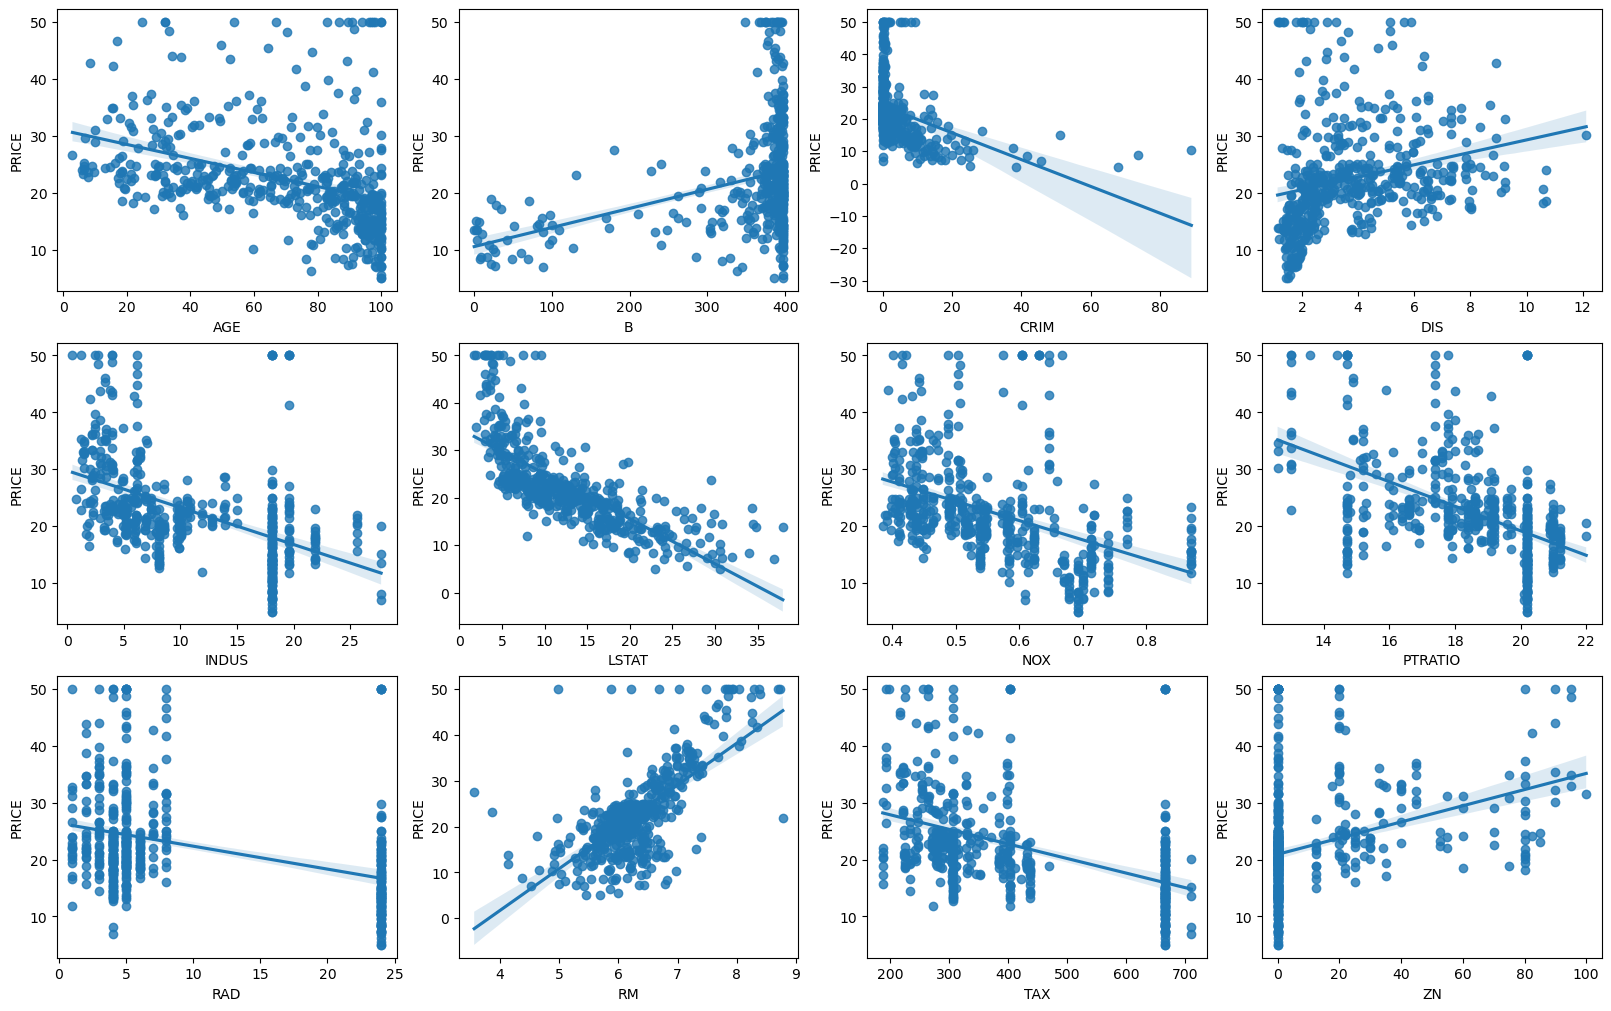

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(figsize=(16,10), ncols=4, nrows=3, constrained_layout=True) 
# 4열 × 3행의 subplot을 만듭니다. 즉, 총 12개의 그래프 영역이 생성됩니다.
# constrained_layout=True는 그래프 간의 간격이 자동 조정되도록 합니다.

features = df.columns.difference(['PRICE', 'CHAS'])
# 데이터프레임 df에서 'PRICE'와 'CHAS'를 제외한 모든 열 이름을 추출합니다.
# (difference()는 집합 차집합과 같은 역할을 합니다.)

for i, feature in zip(range(12), features):
    row = int(i/4)  # 행번호 설정
    col = i%4
    sns.regplot(x=feature, y=df['PRICE'], data=df, ax=axs[row][col])  
    # feature와 PRICE의 관계를 산점도 + 회귀선(regression line) 으로 표시


In [10]:
# 데이터 분할
from sklearn.model_selection import train_test_split
x = df[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']].values
x

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [11]:
y = df['PRICE'].values
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# 학습세트와 평가세트의 비율이 8:2가 되도록 나눔

In [13]:
print("학습데이터세트 PRICE 평균 : ", y_train.mean())
print("평가데이터세트 PRICE 평균 : ", y_test.mean())

학습데이터세트 PRICE 평균 :  22.796534653465343
평가데이터세트 PRICE 평균 :  21.488235294117644


In [14]:
# 전처리 : 입력 최솟값이 0, 최댓값이 1로 되로록 함
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_train_scaled

array([[1.68762759e-01, 0.00000000e+00, 6.42962963e-01, ...,
        8.08510638e-01, 8.80427656e-01, 6.39624724e-01],
       [6.95009416e-03, 0.00000000e+00, 2.74074074e-01, ...,
        8.93617021e-01, 9.96772404e-01, 1.85982340e-01],
       [2.87746689e-04, 3.50000000e-01, 1.97037037e-01, ...,
        4.57446809e-01, 9.12627969e-01, 1.68322296e-01],
       ...,
       [6.68786251e-05, 8.00000000e-01, 4.70370370e-02, ...,
        4.68085106e-01, 9.84971506e-01, 1.17549669e-01],
       [1.25342233e-01, 0.00000000e+00, 6.42962963e-01, ...,
        8.08510638e-01, 2.76186394e-01, 5.94370861e-01],
       [2.46945108e-03, 0.00000000e+00, 2.89629630e-01, ...,
        8.82978723e-01, 1.77719502e-01, 2.45584989e-01]])

In [18]:
# 모델학습 : 선형회귀(Linear Regression) 알고리즘 이용
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(x_train_scaled, y_train)

LinearRegression()

In [20]:
# 예측 성능 평가
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

pred_train =  linear.predict(x_train_scaled)

mae = mean_absolute_error(y_train, pred_train)
mse = mean_squared_error(y_train, pred_train)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, pred_train)  # 데이터에 대한 모델의 설명력을 평가하는 지표

print('MAE: {0: .5f}'.format(mae))
print('MSE: {0: .5f}'.format(mse))
print('RMSE: {0: .5f}'.format(rmse))
print('R2: {0: .5f}'.format(r2))


MAE:  3.32616
MSE:  22.11246
RMSE:  4.70239
R2:  0.74546


In [22]:
# 성능평가 및 예측값 저장
# 평가세트에 훈련된 모델을 적용해보자
x_test_scaled = scaler.transform(x_test)
pred = linear.predict(x_test_scaled)

In [23]:
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)  # 데이터에 대한 모델의 설명력을 평가하는 지표

print('MAE: {0: .5f}'.format(mae))
print('MSE: {0: .5f}'.format(mse))
print('RMSE: {0: .5f}'.format(rmse))
print('R2: {0: .5f}'.format(r2))

MAE:  3.23724
MSE:  24.63539
RMSE:  4.96341
R2:  0.66406


In [24]:
# 실제값과 예측결과를 비교하도록 데이터프레임으로 저장
pred_df = pd.DataFrame(pred, columns=['pred Price'])
pred_df

,pred Price
0,29.218660
1,33.551467
2,14.810658
3,25.084725
4,19.173927
...,...
97,-0.520453
98,13.857699
99,16.195182
100,22.248169


In [25]:
actual = pd.DataFrame(y_test, columns=['actual Price'])
actual

,actual Price
0,23.6
1,32.4
2,13.6
3,22.8
4,16.1
...,...
97,17.9
98,9.6
99,17.2
100,22.5


In [26]:
# 위의 두 데이터프레임 결합
reg_result = pd.concat([actual, pred_df], axis=1)
reg_result.to_csv('reg_result.cav', index=False, encoding='utf-8-sig')
reg_result.head()

,actual Price,pred Price
0,23.6,29.218660
1,32.4,33.551467
2,13.6,14.810658
3,22.8,25.084725
4,16.1,19.173927


In [27]:
reg_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   actual Price  102 non-null    float64
 1   pred Price    102 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [29]:
# 머신러닝 분류분석
from sklearn.datasets import load_iris
import pandas as pd

iris =  load_iris()
iris_dt = iris.data
iris_label = iris.target
df = pd.DataFrame(data =  iris_dt, columns = iris.feature_names)
df['label'] = iris_label
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [30]:
df['label'].unique()  # 0은 Setosa, 1은 Versicolor, 2는 Verginica를 의미

array([0, 1, 2])

In [31]:
df.shape

(150, 5)

In [32]:
# 데이터 분할
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(iris_dt, iris_label, test_size=0.2, random_state=0, stratify=iris_label)


In [33]:
# 전처리
df.isna().sum()  # 각 컬럼의 결측치는 몇개인가

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
label                0
dtype: int64

In [ ]:
# 모델학습 : 의사결정나무를 이용
from sklearn.tree import DecisionTreeClassifier
dtree_clf_5 = DecisionTreeClassifier(max_depth= 5, random_state=100)
dtree_clf_3 = DecisionTreeClassifier(max_depth= 3, random_state=100)
dtree_clf_1 = DecisionTreeClassifier(max_depth= 1, random_state=100)


# 검증평가를 10회 실시, 10회에 걸친 교차검증 정확도의 평균으로 교차검증 최정평가를 결정
from sklearn.model_selection import cross_val_score
import numpy as np

In [41]:
# 교차검증결과 트리 깊이를 5로 설정한 모델로 데이터를 학습했을 때 가장 정확도가 높음
scores = cross_val_score(dtree_clf_5, x_train, y_train, scoring='accuracy', cv=10)

print("교차검증 정확도: ", np.round(scores, 3))
print("평균 검증 정확도: ", np.round(np.mean(scores), 4))

교차검증 정확도:  [0.917 1.    0.917 1.    1.    0.833 1.    0.917 1.    0.833]
평균 검증 정확도:  0.9417


In [42]:
scores = cross_val_score(dtree_clf_3, x_train, y_train, scoring='accuracy', cv=10)

print("교차검증 정확도: ", np.round(scores, 3))
print("평균 검증 정확도: ", np.round(np.mean(scores), 4))

교차검증 정확도:  [0.917 1.    0.917 0.917 1.    0.833 1.    0.917 0.917 0.833]
평균 검증 정확도:  0.925


In [43]:
scores = cross_val_score(dtree_clf_1, x_train, y_train, scoring='accuracy', cv=10)

print("교차검증 정확도: ", np.round(scores, 3))
print("평균 검증 정확도: ", np.round(np.mean(scores), 4))

교차검증 정확도:  [0.667 0.667 0.667 0.667 0.667 0.667 0.667 0.667 0.667 0.667]
평균 검증 정확도:  0.6667


In [44]:
# fit()을 사용해 dtree_clf_5 모델에 x_train과 y_train을 학습시킴
dtree_clf_5.fit(x_train, y_train)
pred = dtree_clf_5.predict(x_test)

from sklearn.metrics import accuracy_score
print("의사결정타무(교차검증 후) 예측 정확도: {0:.5f}".format(accuracy_score(y_test, pred)))

의사결정타무(교차검증 후) 예측 정확도: 0.96667


In [45]:
# 실제값과 예측값 비교
pred = pd.DataFrame(pred, columns=['pred Species'])
pred.head()

,pred Species
0,0
1,1
2,0
3,2
4,0


In [46]:
actual = pd.DataFrame(y_test, columns=['actual'])
actual.head()

,actual
0,0
1,1
2,0
3,2
4,0


In [48]:
classify_result = pd.concat([actual, pred], axis=1)
classify_result.to_csv('clf_result.csv', index=False, encoding='utf-8-sig')
classify_result.head()

,actual,pred Species
0,0,0
1,1,1
2,0,0
3,2,2
4,0,0


In [51]:
classify_result[classify_result['actual'] != classify_result['pred Species']]  # 분류예측이 잘못된 행만 필터링해 보자

,actual,pred Species
23,2,1


In [53]:
len(classify_result[classify_result['actual'] != classify_result['pred Species']]) / len(classify_result)  
# 전체 행에서 분류가 잘못된 행의 비율

0.03333333333333333